In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [76]:
swiggy=pd.read_csv(r"C:\Users\aniru\OneDrive\Desktop\csv_files\swiggy.csv")


In [77]:
swiggy


,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json
...,...,...,...,...,...,...,...,...,...,...,...
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json


In [78]:
col_required = ['name', 'city', 'rating', 'rating_count', 'cost', 'cuisine']
swiggy = swiggy[col_required]

In [79]:
swiggy.head(10)


,name,city,rating,rating_count,cost,cuisine
0,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas"
1,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages
3,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian"
4,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food"
5,Sam Uncle,Abohar,3.6,20+ ratings,₹ 200,Continental
6,shere punjab veg,Abohar,4.0,100+ ratings,₹ 150,North Indian
7,Shri Balaji Vaishno Dhaba,Abohar,--,Too Few Ratings,₹ 100,North Indian
8,Hinglaj Kachori Bhandhar,Abohar,4.2,20+ ratings,₹ 100,"Snacks,Chaat"
9,yummy hub,Abohar,--,Too Few Ratings,₹ 200,Indian


In [80]:
swiggy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          148455 non-null  object
 1   city          148541 non-null  object
 2   rating        148455 non-null  object
 3   rating_count  148455 non-null  object
 4   cost          148410 non-null  object
 5   cuisine       148442 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB


In [81]:
swiggy1=swiggy.copy()


In [82]:
null_values = swiggy1.isna().sum()
null_values

name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
dtype: int64

In [83]:
#plotting the null Values amongst all columns
null_values = swiggy1.isna().sum()
fig = go.Figure(data=[go.Bar(x=null_values.index, y=null_values.values)])
fig.update_layout(title='Null Values Count of Columns in Swiggy1 DataFrame', xaxis_title='Columns', yaxis_title='Count of Null Values')
fig.show()

In [84]:
#Lets delete those rows which has null value
swiggy1.dropna(subset=['rating'], inplace=True)
swiggy1.dropna(subset=['cost'], inplace=True)
swiggy1.dropna(subset=['cuisine'], inplace=True)

In [85]:
# Lets apply the methods to replace the values
swiggy1['rating'] = swiggy1['rating'].str.replace('--', '0')
swiggy1['cost'] = swiggy1['cost'].str.replace('₹', '')
swiggy1['rating_count'] = swiggy1['rating_count'].str.replace('+','').str.replace('K','000').str.replace('Too Few Ratings', '0').str.replace('ratings', '')

In [86]:
swiggy1['rating'] = swiggy1['rating'].astype(float)
swiggy1['rating_count'] = swiggy1['rating_count'].astype(int)
swiggy1['cost'] = swiggy1['cost'].astype(int)

In [87]:
swiggy1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 148398 entries, 0 to 148540
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          148398 non-null  object 
 1   city          148398 non-null  object 
 2   rating        148398 non-null  float64
 3   rating_count  148398 non-null  int64  
 4   cost          148398 non-null  int64  
 5   cuisine       148398 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 7.9+ MB


In [88]:
swiggy1.isna().sum()


name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
dtype: int64

In [89]:
swiggy1.describe()


,rating,rating_count,cost
count,148398.000000,148398.000000,148398.000000
mean,1.611930,58.382930,287.605237
std,1.940886,225.204406,796.762559
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,200.000000
50%,0.000000,0.000000,250.000000
75%,3.800000,50.000000,300.000000
max,5.000000,10000.000000,300350.000000


In [90]:
swiggy1 = swiggy1.drop(swiggy1[swiggy1['cost']>10000].index)


In [91]:
#Adding a new column of Measures so that we can show it as a label
measures_df = pd.DataFrame(swiggy1.describe())
Measures = ['Count', 'Average', 'Std_dev','Minimum','Q1','Q2','Q3','Maximum']

In [92]:
measures_df['Central Tendencies'] = Measures
measures_df

,rating,rating_count,cost,Central Tendencies
count,148397.000000,148397.000000,148397.000000,Count
mean,1.611941,58.383323,285.583213,Average
std,1.940888,225.205113,167.609997,Std_dev
min,0.000000,0.000000,1.000000,Minimum
25%,0.000000,0.000000,200.000000,Q1
50%,0.000000,0.000000,250.000000,Q2
75%,3.800000,50.000000,300.000000,Q3
max,5.000000,10000.000000,8000.000000,Maximum


In [93]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
swiggy1.head(5)

,name,city,rating,rating_count,cost,cuisine
0,AB FOODS POINT,Abohar,0.0,0,200,"Beverages,Pizzas"
1,Janta Sweet House,Abohar,4.4,50,200,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.8,100,100,Beverages
3,Singh Hut,Abohar,3.7,20,250,"Fast Food,Indian"
4,GRILL MASTERS,Abohar,0.0,0,250,"Italian-American,Fast Food"


In [94]:
swiggy1.to_csv('swiggy_cleaned.csv', index=False)

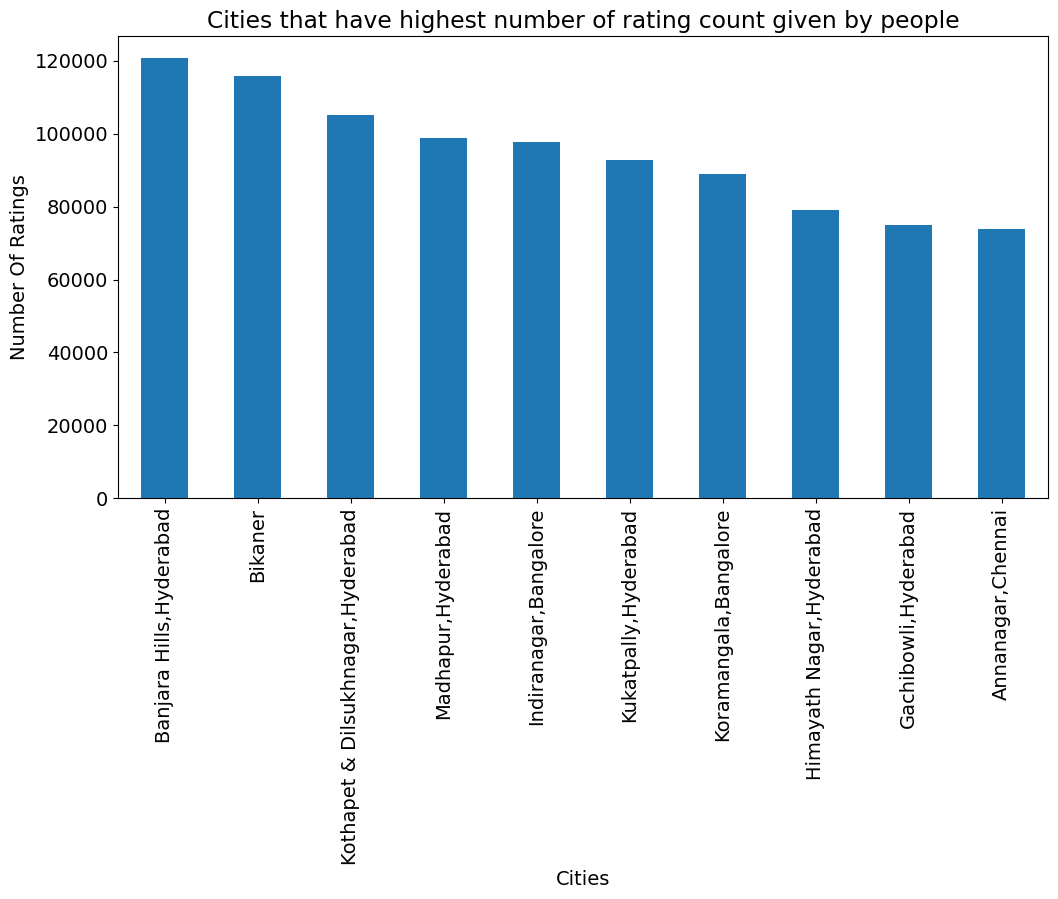

In [95]:
highest_city_rating_count = swiggy1.groupby('city')['rating_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
highest_city_rating_count.head(10).plot.bar()
plt.xlabel('Cities')
plt.ylabel('Number Of Ratings')
plt.title('Cities that have highest number of rating count given by people')
plt.show()

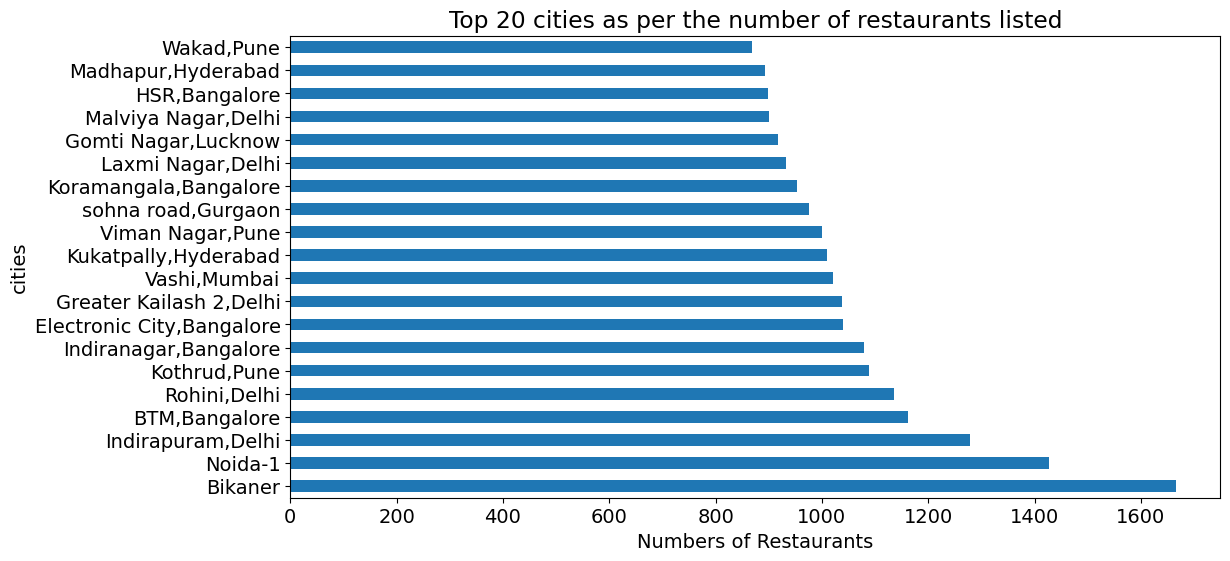

In [96]:
#Top 20 cities as per the number of restaurants listed
top_rest=swiggy1.groupby('city')['name'].count().sort_values(ascending=False)
plt.figure(figsize=(12,6))
top_rest.head(20).plot.barh()
plt.ylabel('cities')
plt.xlabel('Numbers of Restaurants')
plt.title('Top 20 cities as per the number of restaurants listed')
plt.show()

In [97]:
combined=pd.merge(top_rest,highest_city_rating_count,on='city')
fig=px.scatter(combined,x='rating_count',y='name',size='rating_count',title='Relationship Between number of Restaurants listed and rating counts',color=combined.index)
fig.update_yaxes(title_text='Number of the Restaurant in City')
fig.update_xaxes(title_text='Number of Rating Given')
fig.show()

Text(0, 0.5, 'Number of Listed Restaurants')

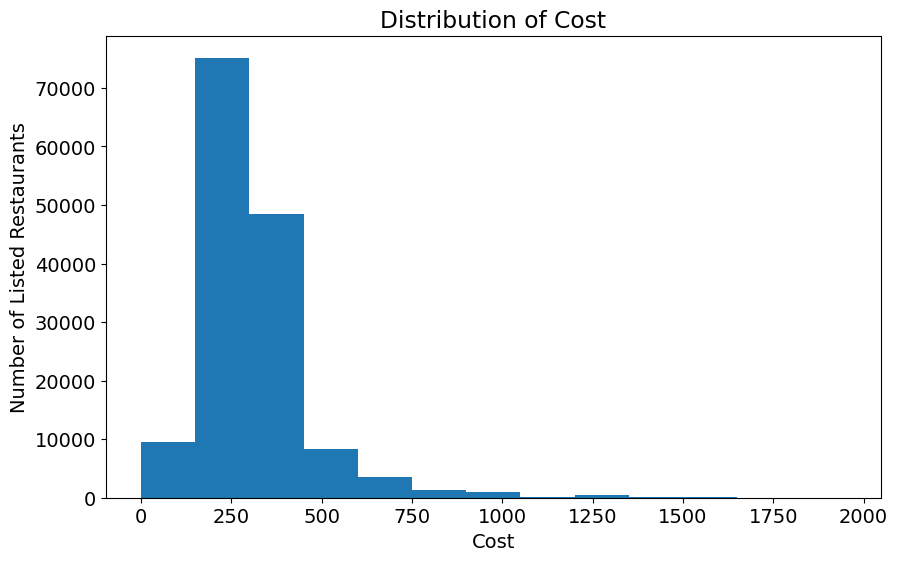

In [98]:
# ploting the distribution of cost
plt.hist(swiggy1['cost'],bins=np.arange(0,2000,150));
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Number of Listed Restaurants')

In [99]:
highest_cost_name=swiggy1.groupby('city')['cost'].max().sort_values(ascending=False).reset_index()


In [100]:
fig=px.bar(highest_cost_name.head(50),
          x='cost',y='city',barmode='relative',title='Highest cost of food in every city')
fig.show()

In [101]:
highest_cost_name= swiggy1.groupby('city')['cost'].max().sort_values(ascending=False).reset_index()
highest_cost=swiggy1.merge(highest_cost_name,on=['city','cost'],how='inner')[['name','city','rating','rating_count','cost','cuisine']]

In [102]:
fig=px.treemap(highest_cost.head(200),
              path=['city','name','rating_count','rating'],
              color_continuous_scale='RdBu',
              values='cost',
              color='rating',
              title='cities with maximum cost')
fig.show()

In [103]:
# lets first sort our datframe swiggy1 for column rating in decending order
highest_rating_count= swiggy1.sort_values(by='rating',ascending =False).reset_index()

In [104]:
fig = px.sunburst(highest_rating_count.head(3000),
                  path = ['cuisine','rating'],
                  values = 'rating_count',
                  color = 'cost', 
                  color_continuous_scale='RdBu',
                  title = 'Cuisines With Maximum Rating Count')
fig.show()

In [105]:
top_rest = swiggy1.groupby('city')['name'].count().sort_values(ascending=False)


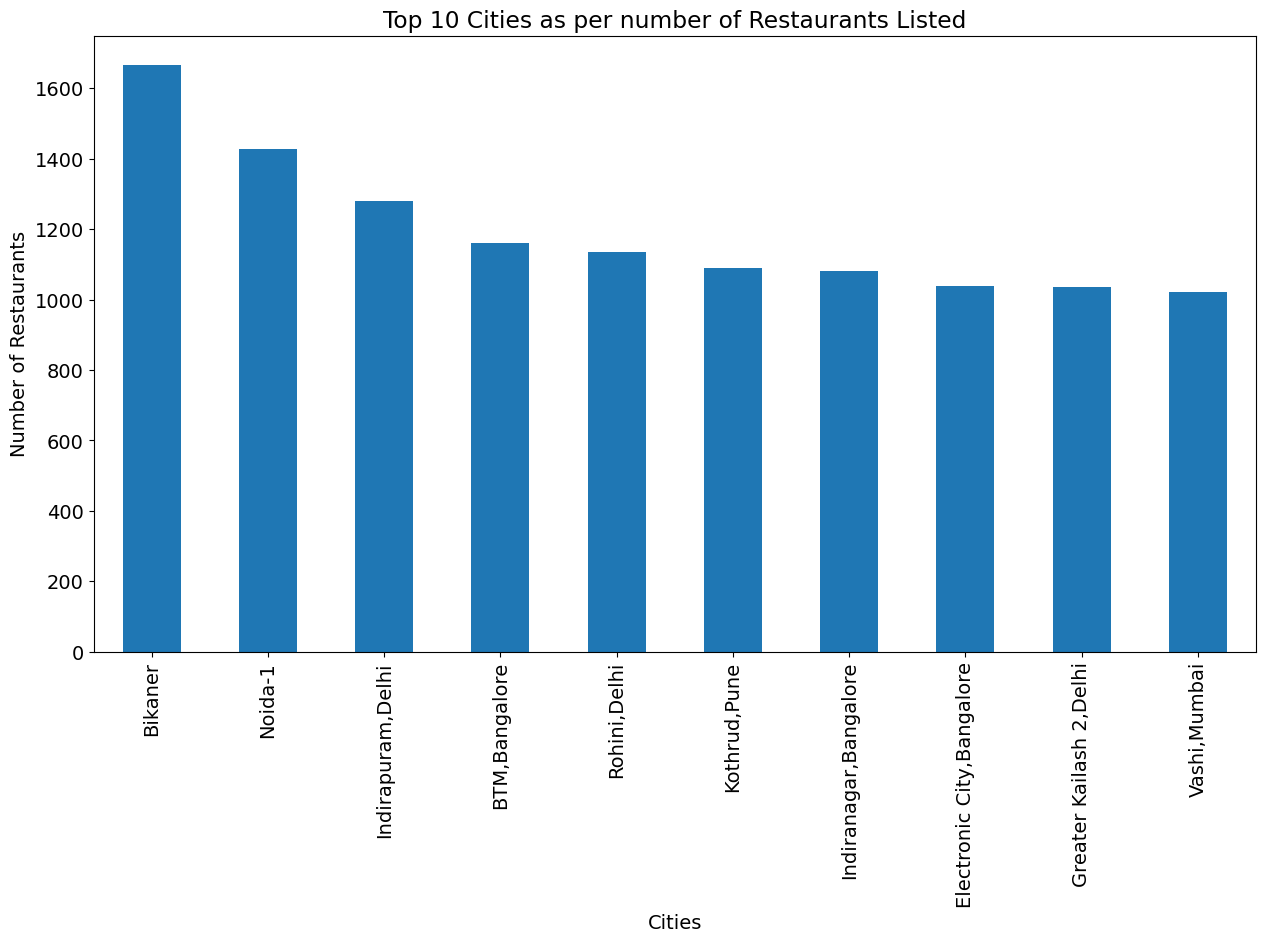

In [106]:
plt.figure(figsize=(15,8))
top_rest.head(10).plot.bar()
plt.title('Top 10 Cities as per number of Restaurants Listed')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.show()

In [107]:
agra_rating=swiggy1[swiggy1['city']=='Agra']
max_rating_in_city=agra_rating.groupby('name')['rating'].max().sort_values(ascending=False).head(40)
max_rating_in_city.head(10)

name
The best diet corner                               5.0
Pablo Premium Kitchen                              5.0
Behrouz Biryani                                    4.6
Panchhi Petha                                      4.5
Domino's Pizza                                     4.4
Kwality Walls Frozen Dessert and Ice Cream Shop    4.4
Grameen Kulfi                                      4.4
NIC Natural Ice Creams                             4.4
PIZZA PASTA DAY                                    4.4
Cafe Coffee Day                                    4.4
Name: rating, dtype: float64

<Axes: title={'center': 'Restaurants that has maximum number of Branches'}, xlabel='Restaurants Name', ylabel='Number of braches'>

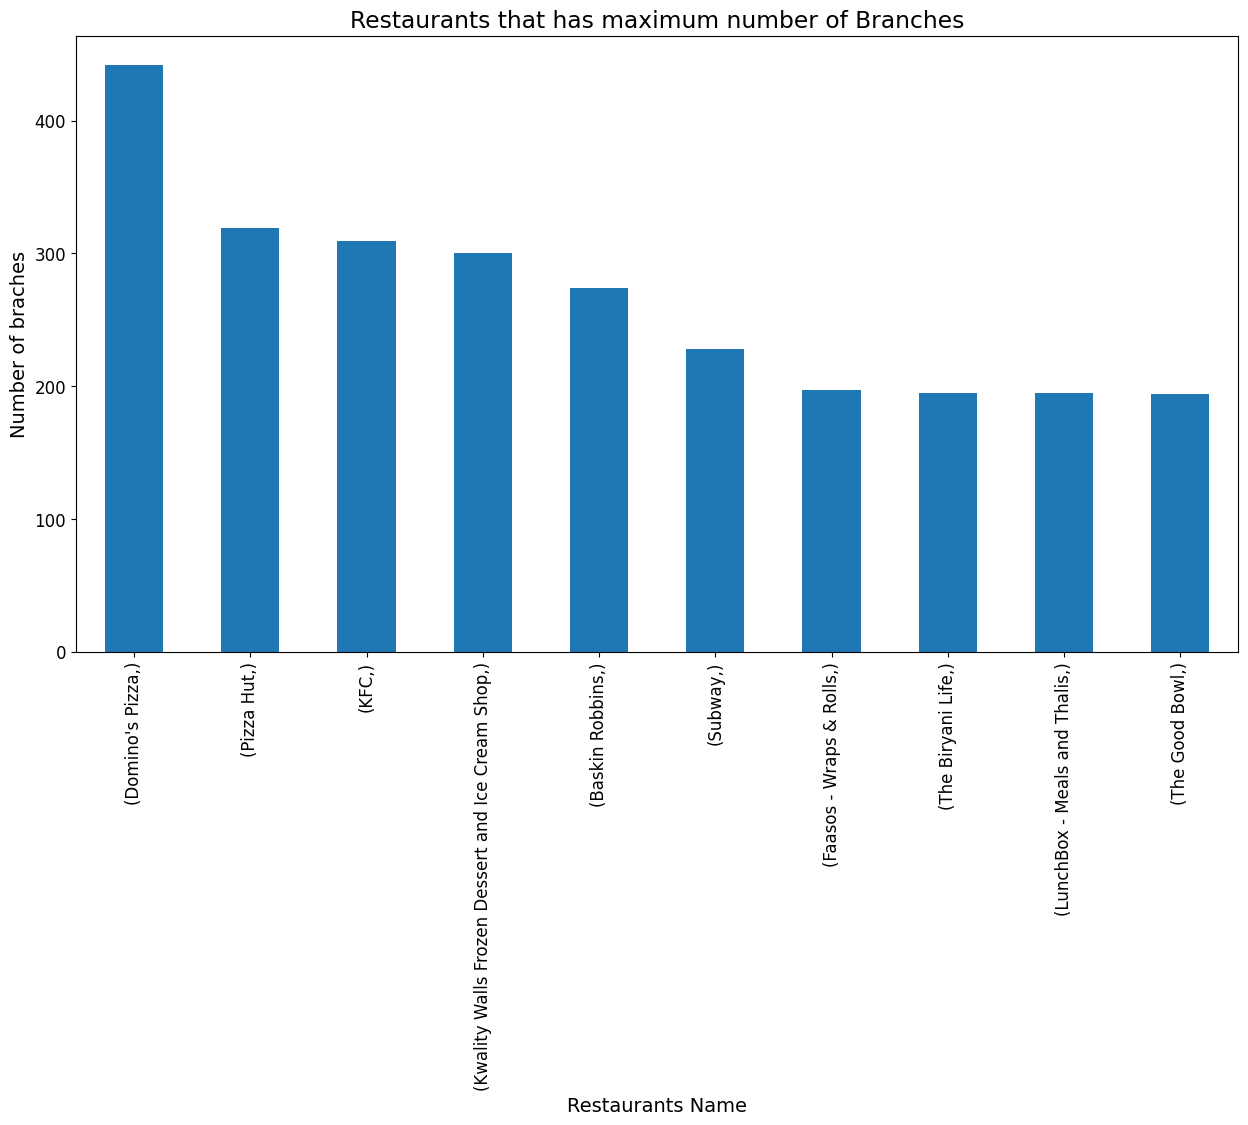

In [108]:
restaurant_chain=swiggy1[['name']].value_counts().sort_values(ascending=False).head(10)
pd.options.plotting.backend='matplotlib'
restaurant_chain.plot(kind='bar',legend=False,
                     title='Restaurants that has maximum number of Branches',
                     xlabel='Restaurants Name',
                     ylabel='Number of braches',
                     figsize=(15,8),
                     fontsize=12)

In [109]:
most_exp=swiggy1.groupby('city')[['cost','rating_count','rating']].mean().sort_values(by='cost',ascending=False).head(10)
city_cost=most_exp.reset_index()

In [110]:
fig=px.scatter(city_cost,
               x='cost',
               y='rating_count',
               size='cost',
               title='Cities that has most expensive food item in their restaurants',
               color='city',
               hover_data={'city' : True})
fig.update_yaxes(title_text='number of rating counts')
fig.update_xaxes(title_text='Cost')
fig.update_layout(width=800,height=600)
fig.show()